<a href="https://colab.research.google.com/github/RodYazdan/CODING-DOJO-Machine-Learning/blob/master/Hirad_Yazdankhah_Project2_Part_5_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Project2- Part 1,2,3,& 4
#Hirad Yazdankhah
#July 28 2022

##################################################################
#PART 0 - IMPORTING LIBRARIES AND DATA
##################################################################

In [200]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
#import seaborn to make a nice heatmap for our confusion matrix
import seaborn as sns

#import some necessary tools
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

#import accuracy, precision, recall, classification report, and confusion matrix scoring functions
from sklearn.metrics import accuracy_score, precision_score, recall_score, classification_report, ConfusionMatrixDisplay

#Importing the Classifiers
from sklearn.tree import DecisionTreeClassifier
from sklearn.dummy import DummyClassifier

#Importing Evaluation Models
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

# For scaling data
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.datasets import load_iris
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

# For Clustering
from sklearn.cluster import DBSCAN
from sklearn.neighbors import NearestNeighbors
from sklearn.datasets import make_circles

##################################################################
#PART 1 - LOADING PENGUIN  CLASSIFICATION DATA SET
##################################################################

In [201]:
#Load the Data
filename1 = '/content/penguins_size.csv'
df1 = pd.read_csv(filename1)
df=df1.copy()
df1.head()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE


In [202]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   culmen_length_mm   342 non-null    float64
 3   culmen_depth_mm    342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                334 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


In [203]:
df1['species'].value_counts()

Adelie       152
Gentoo       124
Chinstrap     68
Name: species, dtype: int64

##################################################################
#PART 2 - DATA PREPROCESSING & CLEANING 
##################################################################

##1-Delete unnecessary columns 

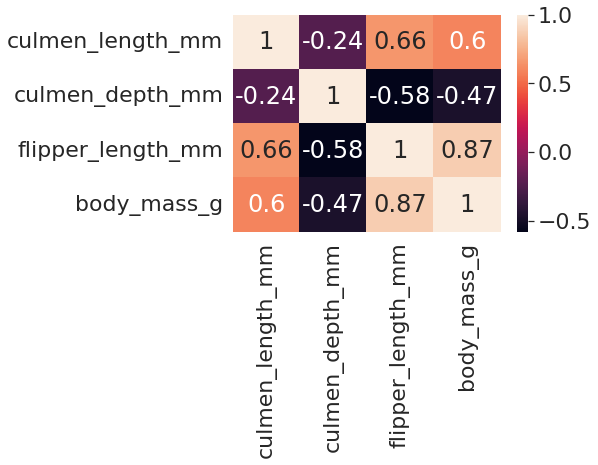

In [204]:
# We look at the relationsip between the variables
corr = df1.corr()
sns.heatmap(corr, annot= True)
# we see that there is a high correlation between all the column values so I am not going to delete any columns

##2-Delete duplicate rows

In [205]:
# shows number of duplicated data
df1.duplicated().sum()
# There are no duplicates.
#
# If there were diplicates we woudl have dropped them with the command below :
#df1 .drop_duplicates(inplace=True)

0

##3-Identify and address missing values 

In [206]:
# Identify Missing Values
df1.isna().sum()
# note all columns except for species and islnd have 2 missing values
# Note that all the coumns with missing values have numerical values that can be replaced with mean or median
# I have chosen medin value to replace the missing values since it is the average  f the data set for the numerical 
 

species               0
island                0
culmen_length_mm      2
culmen_depth_mm       2
flipper_length_mm     2
body_mass_g           2
sex                  10
dtype: int64

In [207]:
df1['culmen_length_mm'].fillna(value=df1['culmen_length_mm'].mean(),inplace=True)
df1['culmen_depth_mm'].fillna(value=df1['culmen_depth_mm'].mean(),inplace=True)
df1['flipper_length_mm'].fillna(value=df1['flipper_length_mm'].mean(),inplace=True)
df1['body_mass_g'].fillna(value=df1['body_mass_g'].mean(),inplace=True)
df1['sex'].fillna(value=df1['sex'].mode()[0],inplace=True)
# Confirm there are no Missing Values
df1.isna().sum()

species              0
island               0
culmen_length_mm     0
culmen_depth_mm      0
flipper_length_mm    0
body_mass_g          0
sex                  0
dtype: int64

###4-Identify and correct inconsistencies in data for categorical values (i.e. Cat, cat, cats)

In [208]:
# df1['sex'].mode()
df1['sex'].value_counts()
# notice we have about the same number of M and F values . However since we have more M I go with the the mode that gets the most frequent occurance

MALE      178
FEMALE    165
.           1
Name: sex, dtype: int64

In [209]:
# also we replace the value (.) with M and check 
df1['sex'] = df1['sex'].replace('.','MALE')
df1['sex'].value_counts()

MALE      179
FEMALE    165
Name: sex, dtype: int64

In [210]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   culmen_length_mm   344 non-null    float64
 3   culmen_depth_mm    344 non-null    float64
 4   flipper_length_mm  344 non-null    float64
 5   body_mass_g        344 non-null    float64
 6   sex                344 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


In [211]:
df1['species'].value_counts()
# Note : Values are consistent

Adelie       152
Gentoo       124
Chinstrap     68
Name: species, dtype: int64

In [212]:
df1['island'].value_counts()
# Note : Values are consistent

Biscoe       168
Dream        124
Torgersen     52
Name: island, dtype: int64

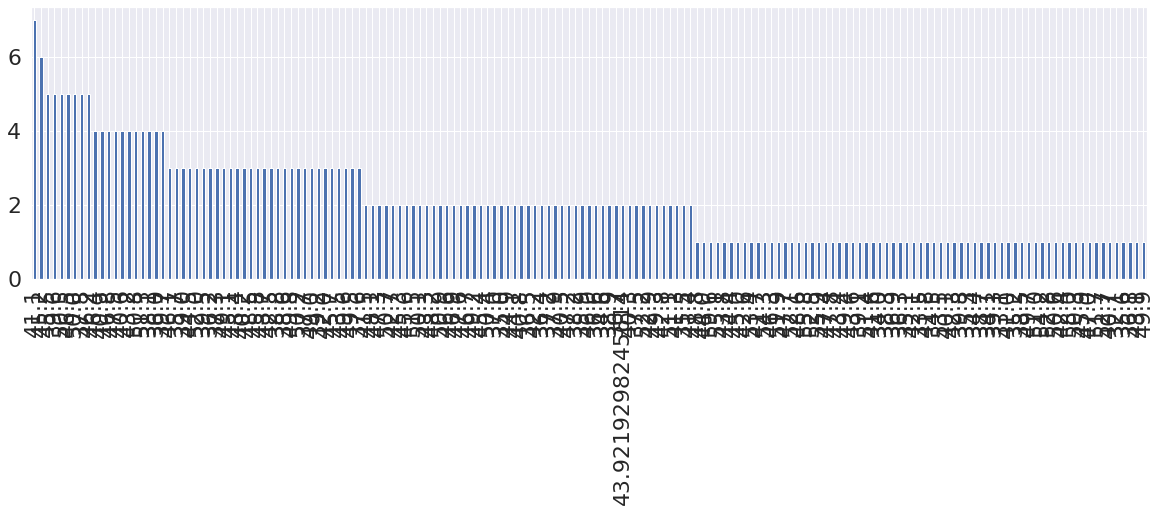

In [213]:
plt.figure(figsize=(20, 5))
df1['culmen_length_mm'].value_counts().plot(kind='bar')
# Note : Values are consistent

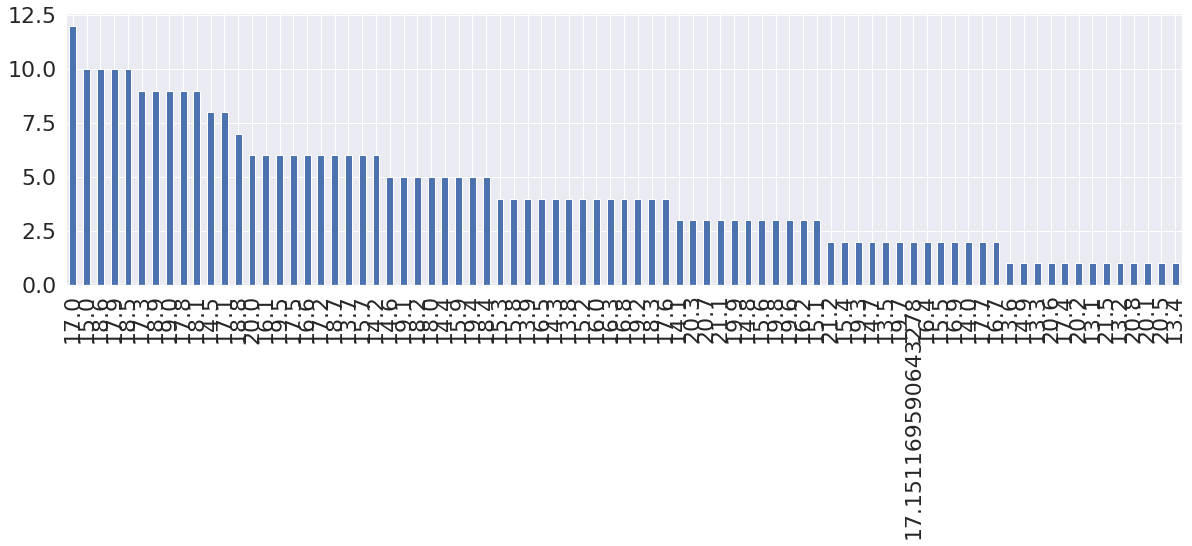

In [214]:
plt.figure(figsize=(20, 5))
df1['culmen_depth_mm'].value_counts().plot(kind='bar')
# Note : Values are consistent

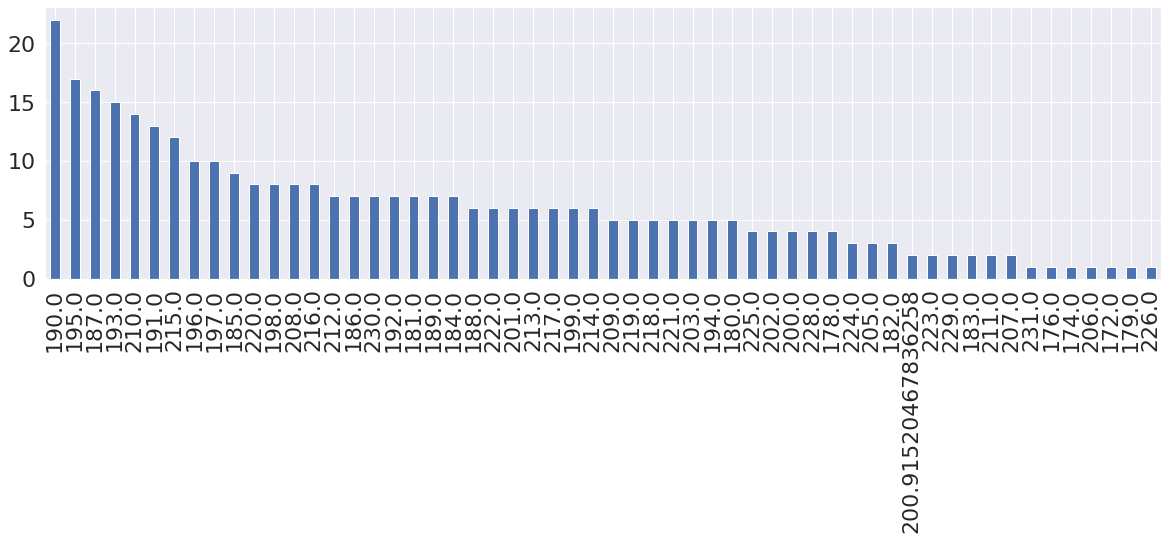

In [215]:
plt.figure(figsize=(20, 5))
df1['flipper_length_mm'].value_counts().plot(kind='bar')
# Note : Values are consistent

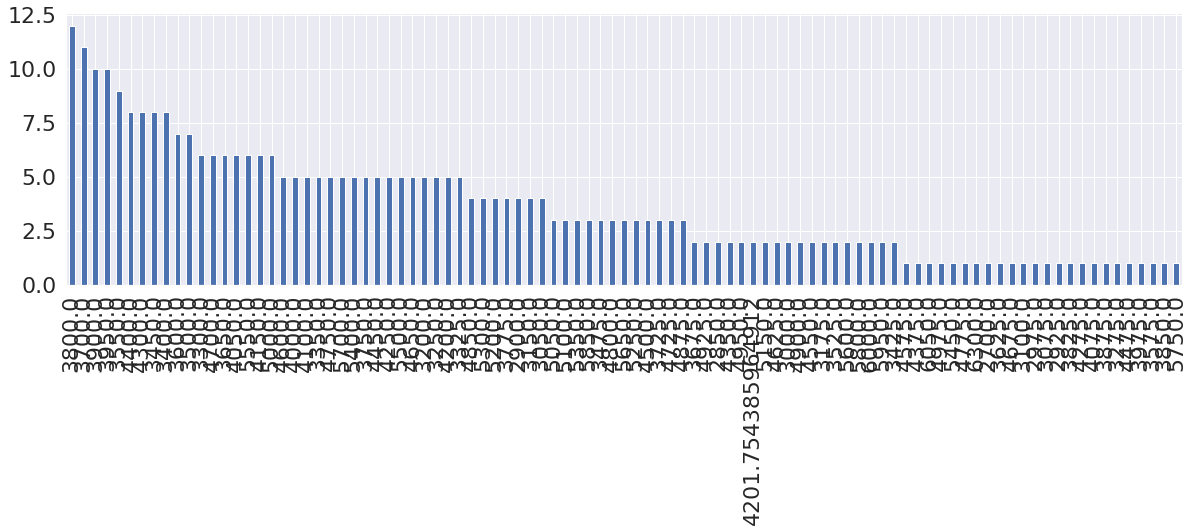

In [216]:
plt.figure(figsize=(20, 5))
df1['body_mass_g'].value_counts().plot(kind='bar')
# Note : Values are consistent

##5-Produce univariate visuals for the target and all features

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:88: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  self._figure.tight_layout(*args, **kwargs)


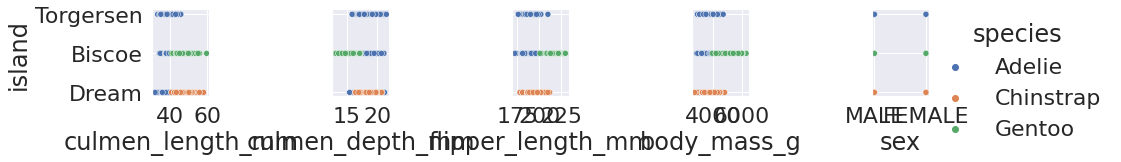

In [217]:
# we get a scatterplot between all of our features and the target 
sns.pairplot(df1,
             
             x_vars = ['culmen_length_mm','culmen_depth_mm','flipper_length_mm','body_mass_g','sex'],
             y_vars = ['island'],
             hue ='species'
             );

###6-Identify outliers 

In [218]:
df1.describe ()
# note that when we look at the mean of each cokumn and compare it to the max and min values the values look reasonalble
# thus I do not think there are any any outliers 

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
count,344.000000,344.000000,344.000000,344.000000
mean,43.921930,17.151170,200.915205,4201.754386
std,5.443643,1.969027,14.020657,799.613058
min,32.100000,13.100000,172.000000,2700.000000
25%,39.275000,15.600000,190.000000,3550.000000
50%,44.250000,17.300000,197.000000,4050.000000
75%,48.500000,18.700000,213.000000,4750.000000
max,59.600000,21.500000,231.000000,6300.000000


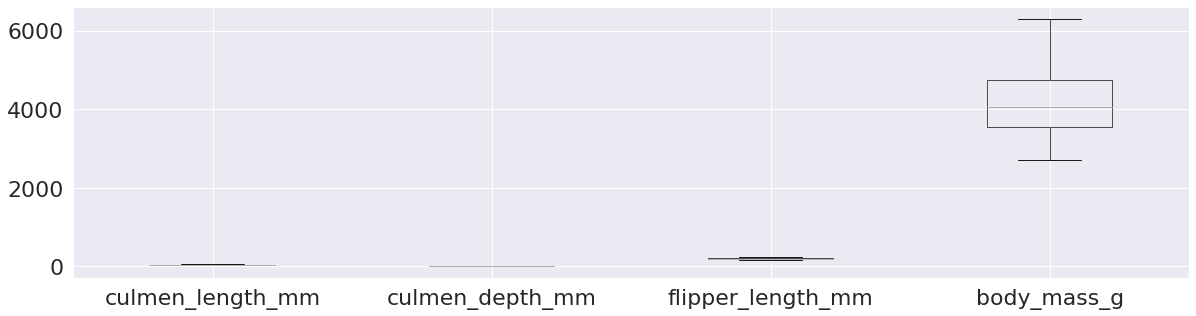

In [219]:
plt.figure(figsize=(20, 5))
df1.boxplot()

##################################################################
#PART 3 DATA VISUALIZATION 
##################################################################

#Identify any moderate or strong correlations between your target and your features and/or between one feature and another

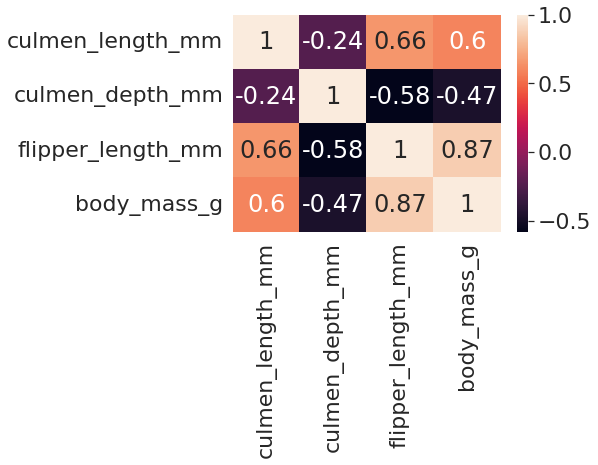

In [220]:
# We look at the relationsip between the variables
corr = df1.corr()
sns.heatmap(corr, annot= True)
# we see that there is a high correlation between all the column values

# Creating multivariate exploratory visuals to further understand your data

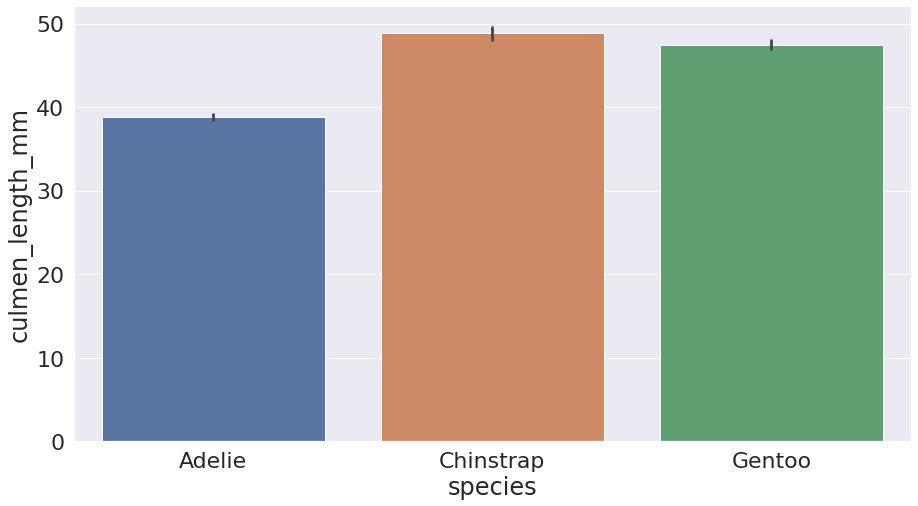

In [221]:
plt.figure(figsize = (15,8))
sns.barplot(data=df1, x='species', y='culmen_length_mm')

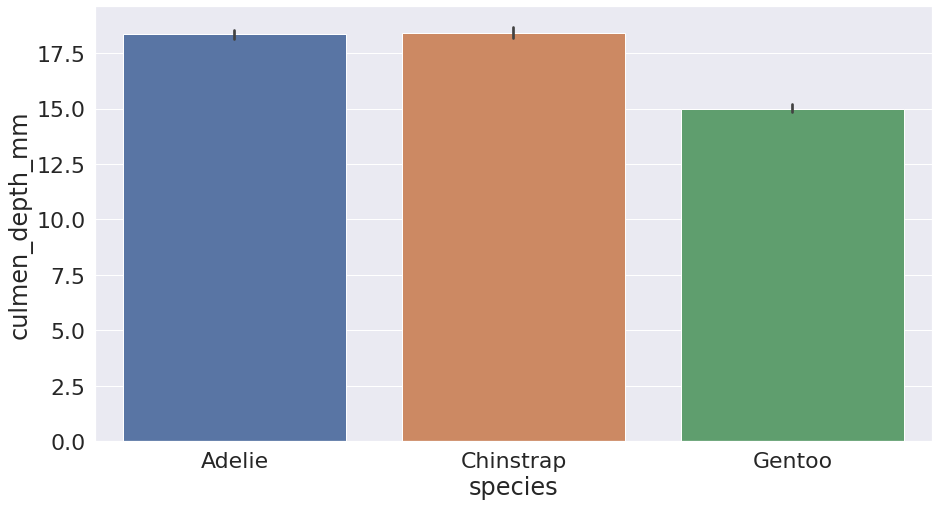

In [222]:
plt.figure(figsize = (15,8))
sns.barplot(data=df1, x='species', y='culmen_depth_mm')

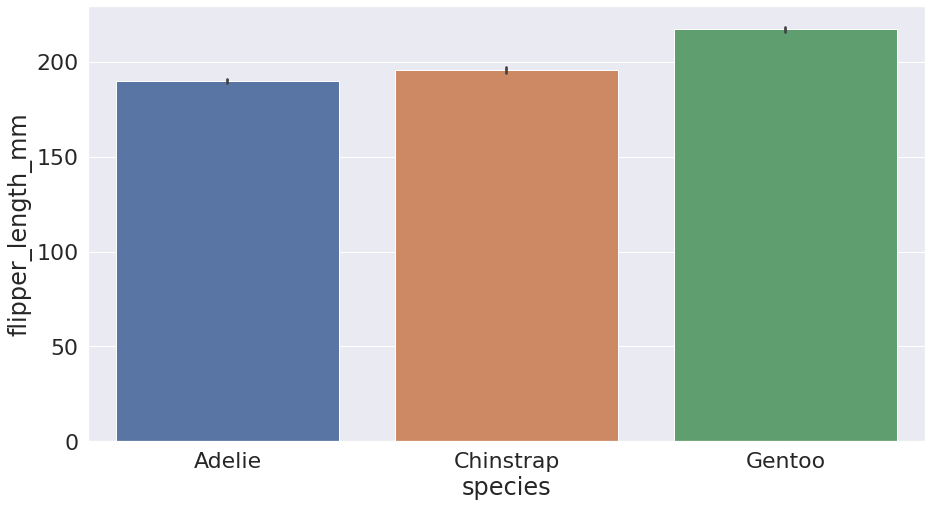

In [223]:
plt.figure(figsize = (15,8))
sns.barplot(data=df1, x='species', y='flipper_length_mm')

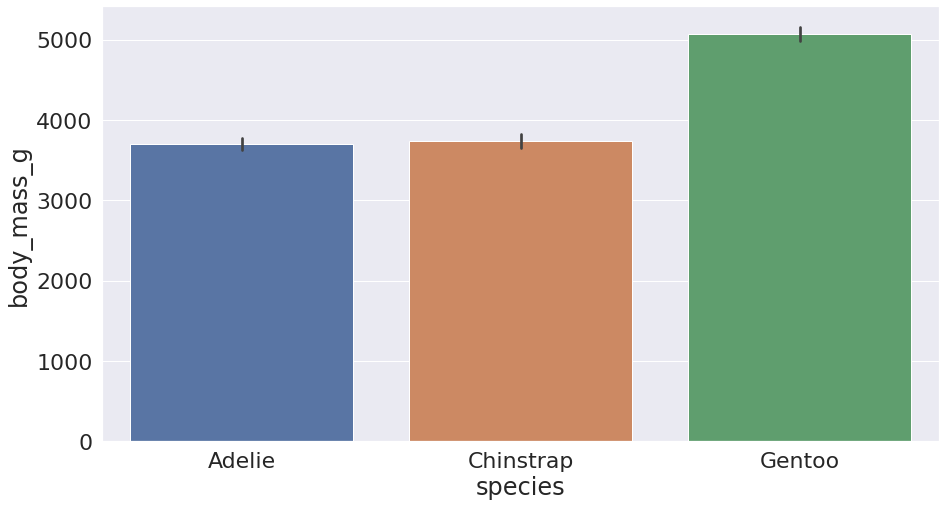

In [224]:
plt.figure(figsize = (15,8))
sns.barplot(data=df1, x='species', y='body_mass_g')

##################################################################
# VISUALIZATIONS FOR REPORT
##################################################################

#From your data analysis, create two visuals that demonstrate key findings of interest to a stakeholder. These visuals should be reporting quality.  Be sure to explain the finding associated with each visual.  (NO histograms, boxplots, or correlation plots)

Text(0.5, 1.0, 'Penguin Body Mass vs Type')

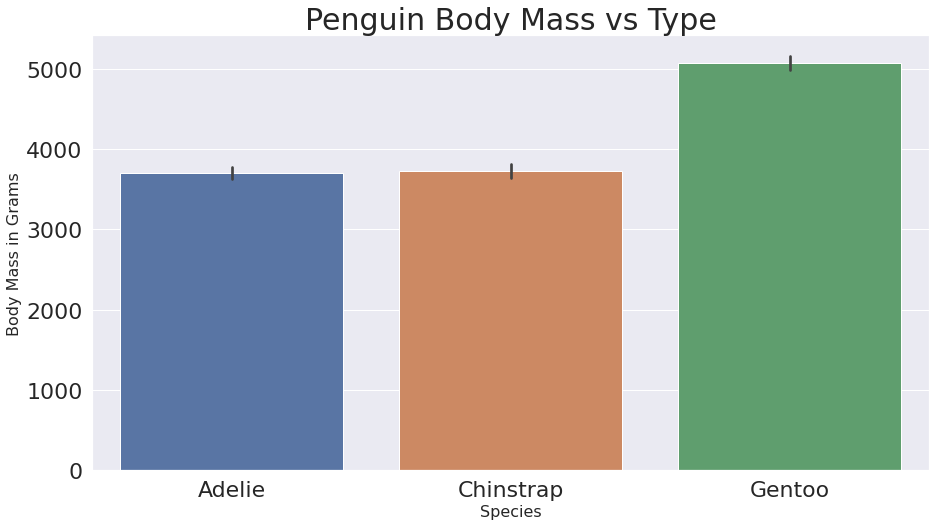

In [225]:
plt.figure(figsize = (15,8))
sns.set(font_scale=2)
sns.barplot(data=df1, x='species', y='body_mass_g').set(title='Penguin Body Mass vs Type')
#modify individual font size of elements
#plt.legend(title='Company', fontsize=20)
plt.xlabel('Species', fontsize=16);
plt.ylabel('Body Mass in Grams', fontsize=16);
plt.title('Penguin Body Mass vs Type', fontsize=30)

Note that the graph above shows that one can recognize the Gento specy easily from the body mass since it is much higher ( over 1000 grams) than the other two species . Even considering the standard deviation which is much lower than the difference between the body mass of Gentoo and the other species.

Text(0.5, 1.0, 'Penguin Culmen Length vs Type')

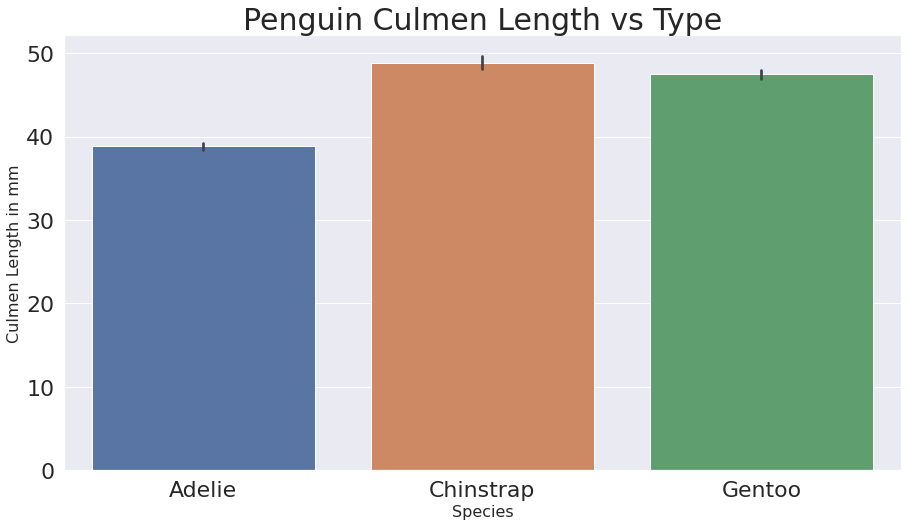

In [226]:
plt.figure(figsize = (15,8))
sns.barplot(data=df1, x='species', y='culmen_length_mm')
#modify individual font size of elements
#plt.legend(title='Company', fontsize=20)
plt.xlabel('Species', fontsize=16);
plt.ylabel('Culmen Length in mm', fontsize=16);
plt.title('Penguin Culmen Length vs Type', fontsize=30)

Note the above graph shows that the Adelie specy can be identified from it's Culmen length which is much smaller than the other twp penguin species. The standard deviation is also rather small compared to the differnce between the Adelie Culmen Length and the others which is about 10 mm.

##################################################################
#PART 4 - MODEL CREATION AND TUNING
##################################################################

##################################################################
#PART 4 - MODEL PREPROCESSING
##################################################################
#### Prepare the data appropriately for modeling 
####Implement a preprocessing pipeline to avoid data leakage.
####Scale the data if your model requires it.
####Write a justification for how you encode the variables (ordinal encoding vs one-hot encoding).
##################################################################

In [227]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import make_column_transformer, make_column_selector
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
from sklearn import set_config
set_config(display='diagram')

In [228]:
#Validation Split
# Assign the target column to y
y = df['species']
# Assign the features to X (In this case we include all columns except the target column)
X = df.drop(columns = 'species')
# Train test split 
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
X_train.shape

(258, 6)

In [229]:
X_test.shape

(86, 6)

In [230]:
# Coumn Selectors
cat_selector = make_column_selector(dtype_include='object')
num_selector = make_column_selector(dtype_include='number')

In [231]:
# Imputers
freq_imputer = SimpleImputer(strategy='most_frequent')
mean_imputer = SimpleImputer(strategy='mean')
# Scaler
scaler = StandardScaler()
# One-hot encoder
ohe = OneHotEncoder(handle_unknown='ignore', sparse=False)

In [232]:
# Numeric pipeline
numeric_pipe = make_pipeline(mean_imputer, scaler)
numeric_pipe

Pipeline(steps=[('simpleimputer', SimpleImputer()),
                ('standardscaler', StandardScaler())])

In [233]:
# Categorical pipeline
categorical_pipe = make_pipeline(freq_imputer, ohe)
categorical_pipe

Pipeline(steps=[('simpleimputer', SimpleImputer(strategy='most_frequent')),
                ('onehotencoder',
                 OneHotEncoder(handle_unknown='ignore', sparse=False))])

In [234]:
# Tuples for Column Transformer
number_tuple = (numeric_pipe, num_selector)
category_tuple = (categorical_pipe, cat_selector)
# ColumnTransformer
preprocessor = make_column_transformer(number_tuple, category_tuple, remainder='passthrough')
preprocessor

ColumnTransformer(remainder='passthrough',
                  transformers=[('pipeline-1',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer()),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7f8b4d3e8e10>),
                                ('pipeline-2',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False))]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7f8b4d3e89d0>)])

In [235]:
#Transformer Data
# fit on train
preprocessor.fit(X_train)

ColumnTransformer(remainder='passthrough',
                  transformers=[('pipeline-1',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer()),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7f8b4d3e8e10>),
                                ('pipeline-2',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False))]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7f8b4d3e89d0>)])

In [236]:
# transform train and test
X_train_processed = preprocessor.transform(X_train)
X_test_processed = preprocessor.transform(X_test)

In [237]:
#Inspect the Results

# Check for missing values and that data is scaled and one-hot encoded
print(np.isnan(X_train_processed).sum().sum(), 'missing values in training data')
print(np.isnan(X_test_processed).sum().sum(), 'missing values in testing data')
print('\n')
print('All data in X_train_processed are', X_train_processed.dtype)
print('All data in X_test_processed are', X_test_processed.dtype)
print('\n')
print('shape of Training data is', X_train_processed.shape)
print('shape of Test data is', X_test_processed.shape)
print('\n')
X_train_processed

0 missing values in training data
0 missing values in testing data


All data in X_train_processed are float64
All data in X_test_processed are float64


shape of Training data is (258, 9)
shape of Test data is (86, 9)




array([[-0.25834958,  1.80260693, -0.28757618, ...,  1.        ,
         0.        ,  1.        ],
       [-0.93567139,  0.05158648, -1.48645056, ...,  0.        ,
         0.        ,  1.        ],
       [ 0.41897222, -1.29920072,  0.55868808, ...,  0.        ,
         1.        ,  0.        ],
       ...,
       [-0.97228338,  0.05158648, -0.14653214, ...,  0.        ,
         1.        ,  0.        ],
       [ 0.4921962 , -1.44928818,  0.6292101 , ...,  0.        ,
         1.        ,  0.        ],
       [-1.13703733, -0.54876338, -1.27488449, ...,  0.        ,
         1.        ,  0.        ]])

###################################################
### DECISION TREE CLASSIFICATION MODEL EVALUATION
###################################################

In [238]:
from sklearn.tree import DecisionTreeClassifier
#import accuracy, precision, recall, classification report, and confusion matrix scoring functions
from sklearn.metrics import accuracy_score, precision_score, recall_score, classification_report, ConfusionMatrixDisplay

In [239]:
dec_tree = DecisionTreeClassifier(random_state = 42, max_depth=2)

In [240]:
dec_tree.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': 2,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': 42,
 'splitter': 'best'}

In [241]:
#Training the model
dec_tree.fit(X_train_processed, y_train)

DecisionTreeClassifier(max_depth=2, random_state=42)

In [242]:
# Predict 
y_pred=dec_tree.predict(X_test_processed)

In [243]:
# calculate classification accuracy
train_score = dec_tree.score(X_train_processed, y_train)
test_score = dec_tree.score(X_test_processed, y_test)

print (f'Decision Tree Training Score: {train_score:.3f}')
print (f'Decision Tree Testing Score: {test_score:.3f}')

Decision Tree Training Score: 0.961
Decision Tree Testing Score: 0.942


In [244]:
# actual values what an algorithm should have predicted
y_true=y_test.values
#print('True Values:')
#y_true

In [245]:
# Model ACCURACY
dec_tree_test_accuracy= accuracy_score(y_true, y_pred)
print(f"Test Accuracy:{dec_tree_test_accuracy:.3f}")

Test Accuracy:0.942


In [246]:
# Model PRECISION 
# dec_tree_test_precision = precision_score(y_true, y_pred)
# print(f"Test Precision:{dec_tree_test_precision:.3f}")

In [247]:
print(classification_report(y_true, y_pred))

              precision    recall  f1-score   support

      Adelie       0.97      0.93      0.95        40
   Chinstrap       0.81      0.94      0.87        18
      Gentoo       1.00      0.96      0.98        28

    accuracy                           0.94        86
   macro avg       0.93      0.94      0.93        86
weighted avg       0.95      0.94      0.94        86



In [248]:
#Importing Evaluation Models
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
# actual values: y_test.values
# predictions: model predictions
cm = confusion_matrix(y_test.values, y_pred)
# Turn into dataframe
cm_df = pd.DataFrame(cm)
cm_df

,0,1,2
0,37,3,0
1,1,17,0
2,0,1,27


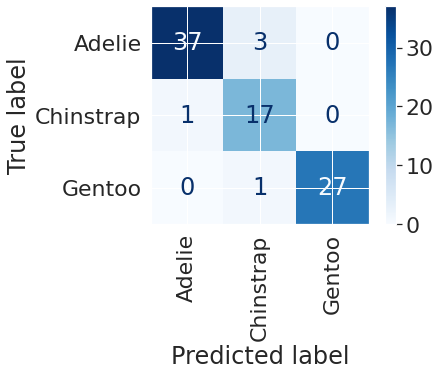

In [249]:
# Plot the confusion matrix
#0 = Not Diabetic, or 1 = Diabetic.
labels=['Adelie','Chinstrap', 'Gentoo']
disp = ConfusionMatrixDisplay.from_predictions(y_test, y_pred, display_labels=labels, cmap='Blues', xticks_rotation="vertical");
# disp = disp.plot(include_values=True, cmap="Reds", ax=None, xticks_rotation="vertical")
# plt.tight_layout()
# plt.show()

###################################################
### KNN CLASSIFICATION MODEL EVALUATION- NO PCA
###################################################

In [250]:
scaler = StandardScaler()

In [251]:
X_train.head()

,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
17,Torgersen,42.5,20.7,197.0,4500.0,MALE
24,Biscoe,38.8,17.2,180.0,3800.0,MALE
238,Biscoe,46.2,14.5,209.0,4800.0,FEMALE
145,Dream,39.0,18.7,185.0,3650.0,MALE
209,Dream,49.3,19.9,203.0,4050.0,MALE


In [252]:
y_train.head()

17        Adelie
24        Adelie
238       Gentoo
145       Adelie
209    Chinstrap
Name: species, dtype: object

In [253]:
#KNN with No PCA
#Step 2:  Put the scaler and the model into a pipeline and fit the pipeline on the training data. 
knn = KNeighborsClassifier(n_neighbors=4)
knn_pipe = make_pipeline(scaler, knn)
knn_pipe.fit(X_train_processed, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('kneighborsclassifier', KNeighborsClassifier(n_neighbors=4))])

In [254]:
#Step 3: Predict the values for the test set
#'%%time' will output under the cell a count of how long it takes the code in that cell to run.
%%time
predictions = knn_pipe.predict(X_test_processed)
predictions

CPU times: user 6.17 ms, sys: 0 ns, total: 6.17 ms
Wall time: 6.18 ms


In [255]:
#Step 4: Evaluate the model's performance on the test set
# calculate classification accuracy
acc_score_no_pca = knn_pipe.score(X_test_processed, y_test)

print(f"Classification Accuracy No PCA: {acc_score_no_pca:.3f}")

Classification Accuracy No PCA: 0.988


In [256]:
print(classification_report(y_true, y_pred))

              precision    recall  f1-score   support

      Adelie       0.97      0.93      0.95        40
   Chinstrap       0.81      0.94      0.87        18
      Gentoo       1.00      0.96      0.98        28

    accuracy                           0.94        86
   macro avg       0.93      0.94      0.93        86
weighted avg       0.95      0.94      0.94        86



In [257]:
# actual values: y_test.values
# predictions: model predictions
cm = confusion_matrix(predictions, y_pred)
# Turn into dataframe
cm_df = pd.DataFrame(cm)
cm_df

,0,1,2
0,38,3,0
1,0,17,0
2,0,1,27


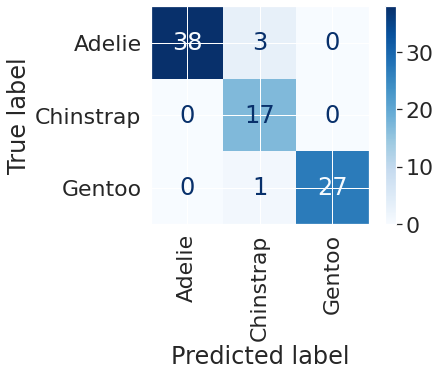

In [258]:
# Plot the confusion matrix
#0 = Not Diabetic, or 1 = Diabetic.
labels=['Adelie','Chinstrap', 'Gentoo']
disp = ConfusionMatrixDisplay.from_predictions(predictions, y_pred, display_labels=labels, cmap='Blues', xticks_rotation="vertical");
# disp = disp.plot(include_values=True, cmap="Reds", ax=None, xticks_rotation="vertical")
# plt.tight_layout()
# plt.show(predictions

###################################################
### KNN CLASSIFICATION MODEL EVALUATION- WITH PCA
###################################################

In [259]:
from sklearn.decomposition import PCA

In [260]:
#Step 1:  Put the scaler and the model into a pipeline and fit the pipeline on the training data. 
# Create a transformer pipeline
transformer = make_pipeline(StandardScaler(), PCA(n_components=.95))

In [261]:
knn = KNeighborsClassifier(n_neighbors=4)
# Create a modeling pipeline
knn_pca_pipe = make_pipeline(transformer, knn)
knn_pca_pipe.fit(X_train_processed, y_train)

Pipeline(steps=[('pipeline',
                 Pipeline(steps=[('standardscaler', StandardScaler()),
                                 ('pca', PCA(n_components=0.95))])),
                ('kneighborsclassifier', KNeighborsClassifier(n_neighbors=4))])

In [262]:
#Step 3: Predict the values for the test set
#'%%time' will output under the cell a count of how long it takes the code in that cell to run.
%%time
preds_with_pca = knn_pca_pipe.predict(X_test_processed)
preds_with_pca

CPU times: user 8.77 ms, sys: 0 ns, total: 8.77 ms
Wall time: 8.54 ms


In [263]:
#Step 4: Evaluate the model's performance on the test set
# calculate classification accuracy
acc_score_with_pca = knn_pca_pipe.score(X_test_processed, y_test)

print(f"Classification Accuracy With PCA: {acc_score_with_pca:.3f}")

Classification Accuracy With PCA: 0.988


In [264]:
print(classification_report(y_true, y_pred))

              precision    recall  f1-score   support

      Adelie       0.97      0.93      0.95        40
   Chinstrap       0.81      0.94      0.87        18
      Gentoo       1.00      0.96      0.98        28

    accuracy                           0.94        86
   macro avg       0.93      0.94      0.93        86
weighted avg       0.95      0.94      0.94        86



In [265]:
# actual values: y_test.values
# predictions: model predictions
cm = confusion_matrix(preds_with_pca, y_pred)
# Turn into dataframe
cm_df = pd.DataFrame(cm)
cm_df

,0,1,2
0,36,3,0
1,2,17,0
2,0,1,27


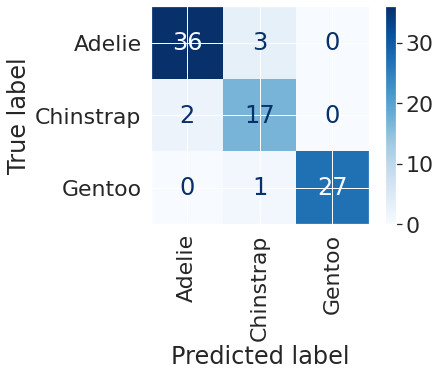

In [266]:
# Plot the confusion matrix
#0 = Not Diabetic, or 1 = Diabetic.
labels=['Adelie','Chinstrap', 'Gentoo']
disp = ConfusionMatrixDisplay.from_predictions(preds_with_pca, y_pred, display_labels=labels, cmap='Blues', xticks_rotation="vertical");
# disp = disp.plot(include_values=True, cmap="Reds", ax=None, xticks_rotation="vertical")
# plt.tight_layout()
# plt.show()

########################################
# FINAL RESULTS
#########################################

The best model is KNN with PCA which has a calssification accuracy of .988 adn runs faster than the KNN without PCA
